# Exploratory Data Analysis - Credit Risk Model

This notebook performs comprehensive exploratory data analysis on the transaction fraud dataset to understand patterns, detect anomalies, and derive insights for credit risk modeling.

## 1. Setup and Data Loading

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [5]:
# Load data
df = pd.read_csv('../data/raw/data.csv')
print(f"Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

Data loaded successfully!
Dataset shape: (95662, 16)


## 2. Data Overview

In [6]:
# Display basic information
print("=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)
print(f"\nNumber of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nFirst few rows:")
df.head()

DATASET OVERVIEW

Number of rows: 95,662
Number of columns: 16

Memory usage: 66.48 MB

First few rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [7]:
# Data types and non-null counts
print("\nColumn Information:")
print("=" * 70)
df.info()


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15

In [8]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")


Duplicate rows: 0 (0.00%)


## 3. Summary Statistics

In [9]:
# Numeric features summary
print("\nNumerical Features Summary:")
print("=" * 100)
df.describe().T


Numerical Features Summary:


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


In [10]:
# Categorical features summary
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical Features ({len(categorical_cols)}): {categorical_cols}")
print("\nUnique value counts:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Features (11): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

Unique value counts:
TransactionId: 95662 unique values
BatchId: 94809 unique values
AccountId: 3633 unique values
SubscriptionId: 3627 unique values
CustomerId: 3742 unique values
CurrencyCode: 1 unique values
ProviderId: 6 unique values
ProductId: 23 unique values
ProductCategory: 9 unique values
ChannelId: 4 unique values
TransactionStartTime: 94556 unique values


In [11]:
# Fraud distribution
print("\nFraud Distribution:")
print("=" * 70)
fraud_counts = df['FraudResult'].value_counts()
fraud_pct = df['FraudResult'].value_counts(normalize=True) * 100

fraud_summary = pd.DataFrame({
    'Count': fraud_counts,
    'Percentage': fraud_pct
})
fraud_summary.index = ['Legitimate', 'Fraud']
print(fraud_summary)
print(f"\nFraud rate: {fraud_pct[1]:.4f}%")


Fraud Distribution:
            Count  Percentage
Legitimate  95469   99.798248
Fraud         193    0.201752

Fraud rate: 0.2018%


## 4. Missing Values Analysis

In [12]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print("\nMissing Values:")
    print("=" * 70)
    print(missing_df)
else:
    print("\n✓ No missing values found in the dataset!")


✓ No missing values found in the dataset!


## 5. Distribution Analysis

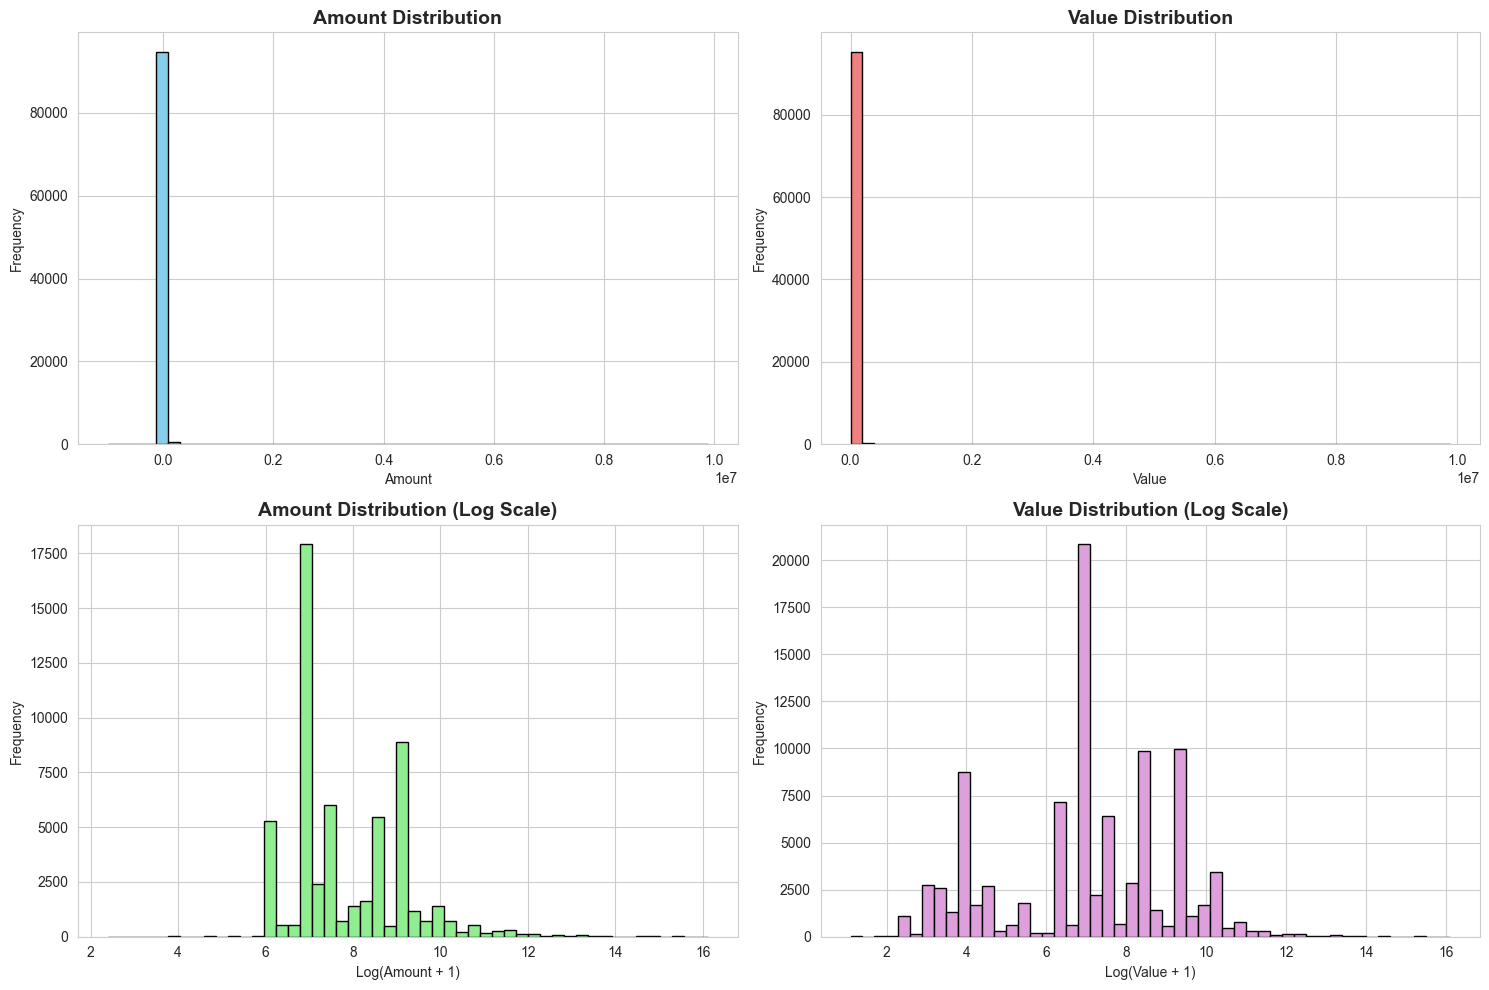

In [13]:
# Amount and Value distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Amount distribution
axes[0, 0].hist(df['Amount'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Amount Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')

# Value distribution
axes[0, 1].hist(df['Value'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Value Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

# Amount (log scale)
axes[1, 0].hist(np.log1p(df['Amount']), bins=50, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Amount Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Log(Amount + 1)')
axes[1, 0].set_ylabel('Frequency')

# Value (log scale)
axes[1, 1].hist(np.log1p(df['Value']), bins=50, color='plum', edgecolor='black')
axes[1, 1].set_title('Value Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Log(Value + 1)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# Fraud distribution by ProductCategory
fraud_by_category = df.groupby('ProductCategory')['FraudResult'].agg(['sum', 'count', 'mean'])
fraud_by_category.columns = ['Fraud_Count', 'Total_Transactions', 'Fraud_Rate']
fraud_by_category = fraud_by_category.sort_values('Fraud_Rate', ascending=False)

print("\nFraud Rate by Product Category:")
print("=" * 70)
print(fraud_by_category)

# Visualize
fig = px.bar(fraud_by_category.reset_index(), 
             x='ProductCategory', 
             y='Fraud_Rate',
             title='Fraud Rate by Product Category',
             labels={'Fraud_Rate': 'Fraud Rate', 'ProductCategory': 'Product Category'},
             color='Fraud_Rate',
             color_continuous_scale='Reds')
fig.show()


Fraud Rate by Product Category:
                    Fraud_Count  Total_Transactions  Fraud_Rate
ProductCategory                                                
transport                     2                  25    0.080000
utility_bill                 12                1920    0.006250
financial_services          161               45405    0.003546
airtime                      18               45027    0.000400
data_bundles                  0                1613    0.000000
movies                        0                 175    0.000000
other                         0                   2    0.000000
ticket                        0                 216    0.000000
tv                            0                1279    0.000000


In [15]:
# PricingStrategy distribution
pricing_dist = df['PricingStrategy'].value_counts().sort_index()
fig = px.pie(values=pricing_dist.values, 
             names=pricing_dist.index,
             title='Pricing Strategy Distribution',
             hole=0.4)
fig.show()

## 6. Correlation Analysis

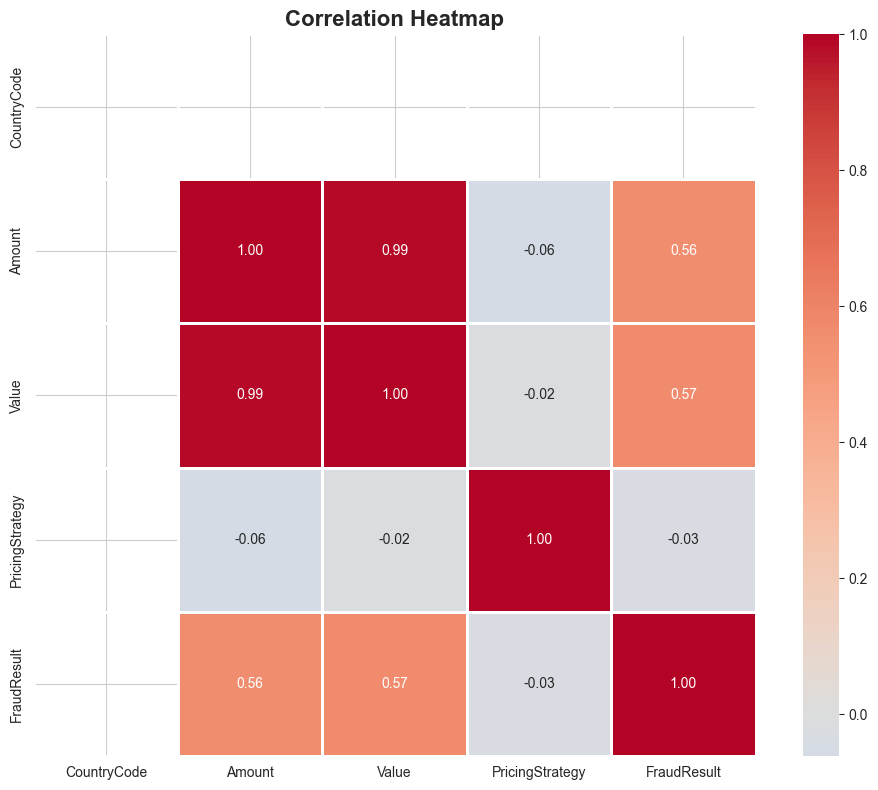

In [16]:
# Numeric correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Correlation with FraudResult
fraud_corr = correlation_matrix['FraudResult'].sort_values(ascending=False)
print("\nCorrelation with Fraud:")
print("=" * 70)
print(fraud_corr)


Correlation with Fraud:
FraudResult        1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
CountryCode             NaN
Name: FraudResult, dtype: float64


## 7. Outlier Detection

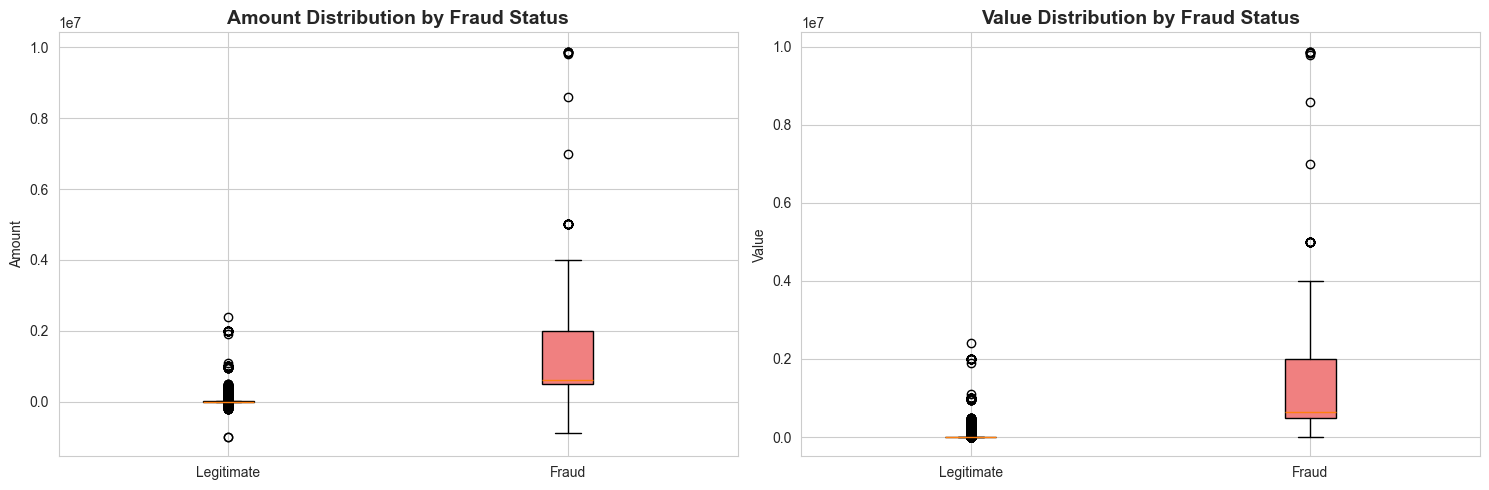

In [18]:
# Box plots for Amount and Value
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Amount boxplot
bp1 = axes[0].boxplot([df[df['FraudResult']==0]['Amount'].dropna(),
                        df[df['FraudResult']==1]['Amount'].dropna()],
                       labels=['Legitimate', 'Fraud'],
                       patch_artist=True)
axes[0].set_title('Amount Distribution by Fraud Status', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Amount')
bp1['boxes'][0].set_facecolor('lightgreen')
bp1['boxes'][1].set_facecolor('lightcoral')

# Value boxplot
bp2 = axes[1].boxplot([df[df['FraudResult']==0]['Value'].dropna(),
                        df[df['FraudResult']==1]['Value'].dropna()],
                       labels=['Legitimate', 'Fraud'],
                       patch_artist=True)
axes[1].set_title('Value Distribution by Fraud Status', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Value')
bp2['boxes'][0].set_facecolor('lightgreen')
bp2['boxes'][1].set_facecolor('lightcoral')

plt.tight_layout()
plt.show()

In [20]:
# IQR method for outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nOutlier Detection (IQR Method):")
print("=" * 70)
for col in ['Amount', 'Value']:
    count, lower, upper = detect_outliers_iqr(df, col)
    pct = (count / len(df)) * 100
    print(f"{col}:")
    print(f"  Outliers: {count:,} ({pct:.2f}%)")
    print(f"  Bounds: [{lower:.2f}, {upper:.2f}]")
    print()


Outlier Detection (IQR Method):
Amount:
  Outliers: 24,441 (25.55%)
  Bounds: [-4325.00, 7075.00]

Value:
  Outliers: 9,021 (9.43%)
  Bounds: [-6812.50, 12087.50]



## 8. Time Series Analysis (if applicable)

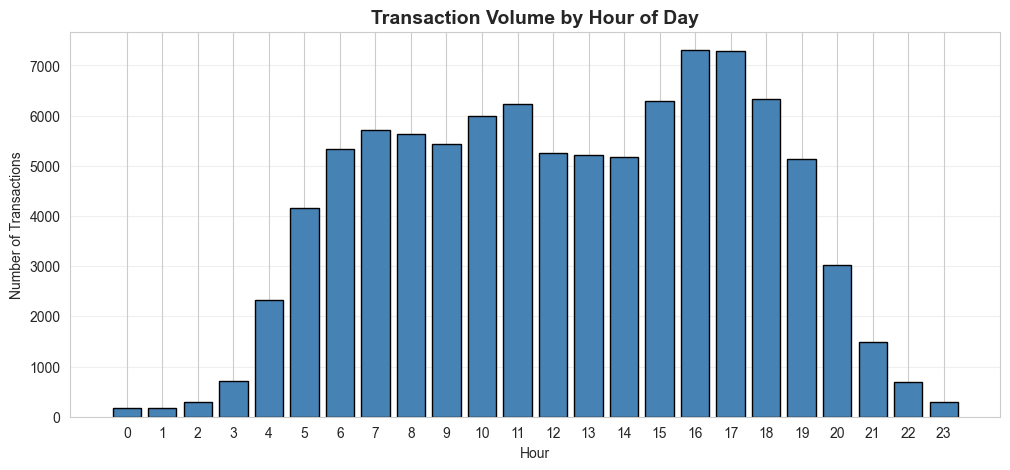

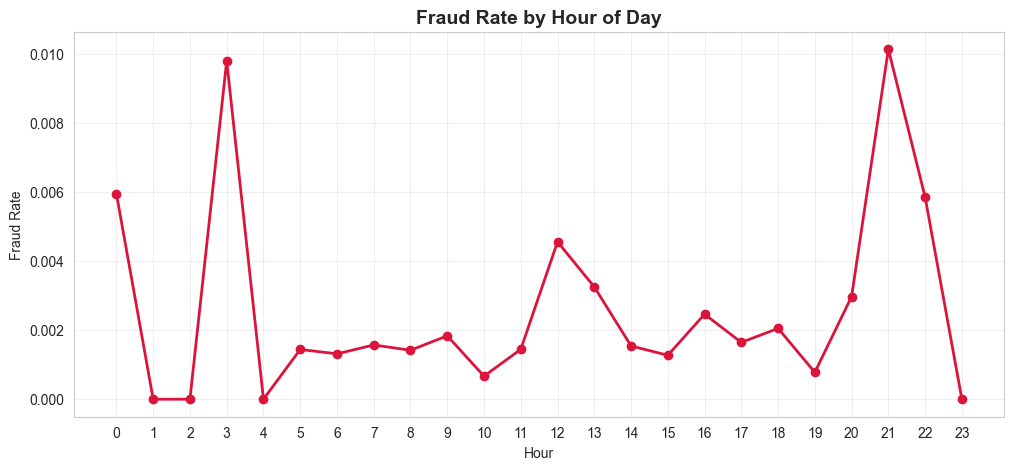

In [21]:
# Parse datetime
if 'TransactionStartTime' in df.columns:
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    df['Hour'] = df['TransactionStartTime'].dt.hour
    df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
    df['Date'] = df['TransactionStartTime'].dt.date
    
    # Transactions by hour
    hourly_dist = df.groupby('Hour').size()
    
    plt.figure(figsize=(12, 5))
    plt.bar(hourly_dist.index, hourly_dist.values, color='steelblue', edgecolor='black')
    plt.title('Transaction Volume by Hour of Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour')
    plt.ylabel('Number of Transactions')
    plt.xticks(range(24))
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    # Fraud rate by hour
    hourly_fraud = df.groupby('Hour')['FraudResult'].mean()
    
    plt.figure(figsize=(12, 5))
    plt.plot(hourly_fraud.index, hourly_fraud.values, marker='o', 
             color='crimson', linewidth=2, markersize=6)
    plt.title('Fraud Rate by Hour of Day', fontsize=14, fontweight='bold')
    plt.xlabel('Hour')
    plt.ylabel('Fraud Rate')
    plt.xticks(range(24))
    plt.grid(True, alpha=0.3)
    plt.show()

## 9. Channel and Provider Analysis

In [22]:
# Top channels by volume
channel_volume = df['ChannelId'].value_counts().head(10)

fig = px.bar(x=channel_volume.index, y=channel_volume.values,
             title='Top 10 Channels by Transaction Volume',
             labels={'x': 'Channel ID', 'y': 'Transaction Count'},
             color=channel_volume.values,
             color_continuous_scale='Blues')
fig.show()

In [23]:
# Fraud rate by channel
channel_fraud = df.groupby('ChannelId')['FraudResult'].agg(['sum', 'count', 'mean'])
channel_fraud.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']
channel_fraud = channel_fraud[channel_fraud['Total'] >= 100].sort_values('Fraud_Rate', ascending=False).head(10)

print("\nTop Channels by Fraud Rate (min 100 transactions):")
print("=" * 70)
print(channel_fraud)


Top Channels by Fraud Rate (min 100 transactions):
             Fraud_Count  Total  Fraud_Rate
ChannelId                                  
ChannelId_1            4    538    0.007435
ChannelId_3          184  56935    0.003232
ChannelId_2            5  37141    0.000135
ChannelId_5            0   1048    0.000000


## 10. Key Insights and Summary

In [24]:
print("\n" + "="*80)
print(" " * 25 + "KEY INSIGHTS")
print("="*80)

insights = [
    f"1. Dataset contains {len(df):,} transactions with {df.shape[1]} features",
    f"2. Overall fraud rate is {df['FraudResult'].mean()*100:.4f}%, indicating highly imbalanced classes",
    f"3. Amount and Value distributions are right-skewed with significant outliers",
    f"4. Product categories show varying fraud rates, with some categories riskier than others",
    f"5. Strong correlation ({correlation_matrix.loc['Amount', 'Value']:.3f}) between Amount and Value suggests consistent pricing"
]

for insight in insights:
    print(f"\n{insight}")

print("\n" + "="*80)
print("\nRECOMMENDATIONS FOR MODELING:")
print("=" * 80)
recommendations = [
    "• Use SMOTE or other resampling techniques to address class imbalance",
    "• Consider log transformation for Amount and Value features",
    "• Include interaction features between Channel, Provider, and Product Category",
    "• Implement time-based features (hour, day of week) for temporal patterns",
    "• Use ensemble methods (XGBoost, Random Forest) for better performance on imbalanced data"
]

for rec in recommendations:
    print(f"\n{rec}")

print("\n" + "="*80)


                         KEY INSIGHTS

1. Dataset contains 95,662 transactions with 19 features

2. Overall fraud rate is 0.2018%, indicating highly imbalanced classes

3. Amount and Value distributions are right-skewed with significant outliers

4. Product categories show varying fraud rates, with some categories riskier than others

5. Strong correlation (0.990) between Amount and Value suggests consistent pricing


RECOMMENDATIONS FOR MODELING:

• Use SMOTE or other resampling techniques to address class imbalance

• Consider log transformation for Amount and Value features

• Include interaction features between Channel, Provider, and Product Category

• Implement time-based features (hour, day of week) for temporal patterns

• Use ensemble methods (XGBoost, Random Forest) for better performance on imbalanced data

